In [1]:
import math, glob, collections,tqdm 
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.pylab as pl
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['axes.linewidth'] = 0.8

saveformat = '.eps' # or ''
dpi = 1200
paramtitle = False

In [3]:
dataset = 'sp500'
stream = np.load(f'./datasets/{dataset}.npy')
p,T = stream.shape
p,T

(133, 10677)

In [4]:
ll = np.sort(np.abs(stream+0.00000001).reshape(-1,))
print(np.sum(np.isclose(ll,0.0)) / (stream.shape[0] * stream.shape[1]))
print(np.quantile(ll,0.99))

0.07183736244235202
0.06958769555030306


In [4]:
window_dict = {}
for wdw in tqdm.tqdm([10, 20, 50, 100, 200, 500, 800, 1000]):

    s_list = []
    dist_list = []
    for i in range(T//wdw):
        part = stream[:,T%wdw + i*wdw : T%wdw + (i+1)*wdw]
        _, s, _ = np.linalg.svd(part @ part.T / wdw)
        s_list.append(s)

        if i > 0 :
            dist_list.append(np.linalg.norm(final - part,ord=2))
        final = part
    dist_list = np.asarray(dist_list)
    dist_list.shape

    window_dict[wdw] = dist_list

100%|██████████| 8/8 [05:19<00:00, 39.90s/it] 


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


[[0.65098039 0.65098039 0.65098039 1.        ]
 [0.55686275 0.55686275 0.55686275 1.        ]
 [0.4627451  0.4627451  0.4627451  1.        ]
 [0.37254902 0.37254902 0.37254902 1.        ]
 [0.27843137 0.27843137 0.27843137 1.        ]
 [0.18431373 0.18431373 0.18431373 1.        ]
 [0.09019608 0.09019608 0.09019608 1.        ]
 [0.         0.         0.         1.        ]]
0.18244263622717335 10
0.17224594438499544 20
0.16938865221485824 50
0.16677314772696955 100
0.17077061673874336 200
0.17579751915932276 500
0.1756494694343613 800
0.18142208525895345 1000


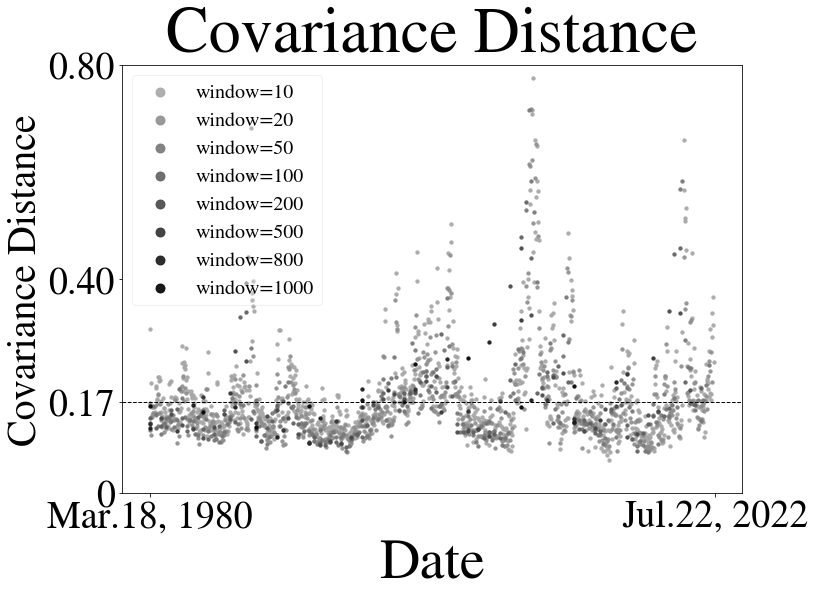

In [5]:
TITLESIZE = 64
TICKSIZE  = 38
LABELSIZE = 56
LEGENDSIZE= 20

ojacolor = pl.cm.binary(np.linspace(0.35, 1.0, len(window_dict)))
print(ojacolor)
window_dict = collections.OrderedDict(sorted(window_dict.items()))

fig = plt.figure(figsize=(12,9),facecolor=(1, 1, 1))
plt.title('Covariance Distance',fontsize=TITLESIZE)
plt.rc('font', size=30) 

plt.axhline(y = 0.17, color = 'k', linestyle = '--', linewidth=1.0)
for idx, (wdw, dist_list) in enumerate(window_dict.items()):
    plt.scatter(np.arange(len(dist_list))*wdw,dist_list/math.sqrt(wdw),s=11,label=f'window={wdw}',color=ojacolor[idx],alpha=0.9)
    print(np.average(dist_list)/math.sqrt(wdw),wdw)
    
lgnd = plt.legend(fontsize=LEGENDSIZE,loc='upper left',framealpha=0.3)
for idx in range(len(window_dict)):
    lgnd.legendHandles[idx]._sizes = [80]

plt.yticks(fontsize=TICKSIZE)
plt.ylim(0,.8)
plt.xticks([0,10676],['Mar.18, 1980','Jul.22, 2022'],fontsize=TICKSIZE)
plt.yticks([0,0.17,0.4,0.8],['0','0.17','0.40','0.80'],fontsize=TICKSIZE)
plt.ylabel('Covariance Distance',fontsize=40)
plt.xlabel('Date',fontsize=LABELSIZE)

plt.tight_layout()

plt.savefig('./figures/'+f'sp_Gamma.eps',dpi=600)

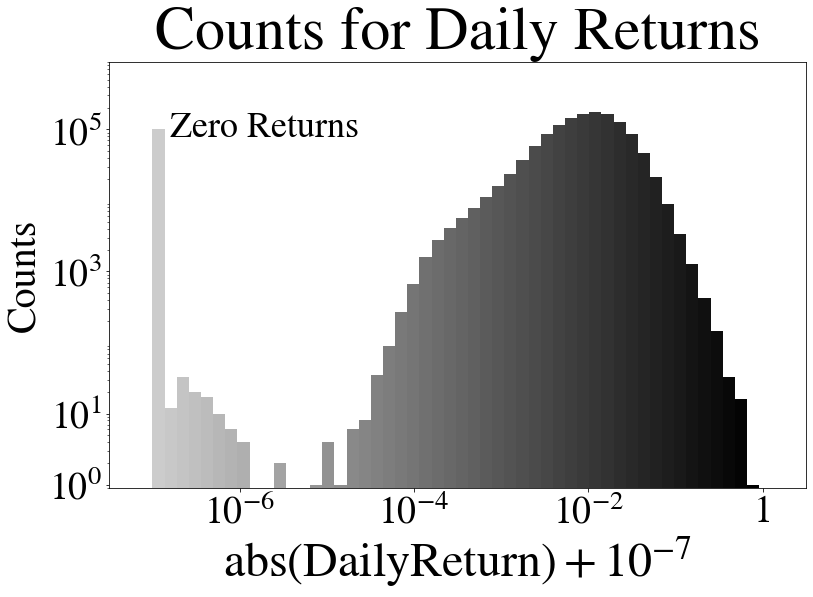

In [6]:
TITLESIZE = 60
TICKSIZE  = 38
LABELSIZE = 48
LEGENDSIZE= 20

NBINS = 50

histcolor = pl.cm.binary(np.linspace(0.2, 1.0, NBINS))

fig = plt.figure(figsize=(12,9),facecolor=(1, 1, 1))
plt.title('Counts for Daily Returns',fontsize=TITLESIZE)
plt.rc('font', size=30) 

n, bins, patches = plt.hist(np.log10(np.abs(stream).reshape(-1,)+1.0e-7),bins=NBINS)
for i in range(len(patches)):
    patches[i].set_facecolor(histcolor[i])

plt.annotate('Zero Returns', xy=(-6.9,5e4), xytext=(-6.8, 8e4), fontsize=36)

plt.xlim(-7.5,0.5)
plt.ylim(0.9,9.0e5)
plt.xticks([-6, -4, -2, 0],[r'$10^{-6}$',r'$10^{-4}$',r'$10^{-2}$','1'],fontsize=TICKSIZE)
plt.ylabel('Counts',fontsize=40)
plt.xlabel(r'$\mathrm{abs(Daily Return)}+10^{-7}$',fontsize=LABELSIZE)
plt.ticklabel_format(axis='y',style='sci', scilimits=(0,0))
plt.yscale('log')
plt.yticks([1, 10, 1000, 100000], fontsize=TICKSIZE)

plt.tight_layout()

plt.savefig('./figures/'+f'sp_hist.eps',dpi=600)